# CRM модель по 4 скважинам из РН-КИН, месторождение 8, объект 57

    Нагнетательная скважина №5626
    
    Нагнетательная скважина №5150
    
    Добывающая скважина №5606
        
    Добывающая скважина №5961
    


i - добывающая, j - нагнетательная

In [3]:
import scipy.optimize as spo

import matplotlib.pyplot as plt
import numpy as np



INJ1 = '4377 4330 4805 5943 4554 4514 4530 4461 4389 3996 2956 1725 1654 1538 1858 1909 1861 1995 2093 2052 2249 1810 3029 3854 2652 1825 1604 2021 2113 2342 2338 1757 2330 2565 2224 2278 2181 2093 2594 2874 3122 2273 3148 2797 2806 2794 3005 3396 3446 3420 3427 3354 3220 3046 2946 2663 2893 3195 2352 2447 2285 1999 2598 2417 4044 718'
INJ2 = '118 2945 1232 1980 1929 2150 1988 917 1903 2665 2683 2883 2874 2440 2822 3343 3487 3582 3102 2987 3438 4911 3896 3265 3185 2707 2692 2496 2394 2621 2927 2676 2779 2708 2412 2800 3185 3389 2935 2546 3611 3557 3956 3967 4106 4185 3739 3865 3947 4031 3555 3486 3440 3482 3504 2912 3126 3071 2873 3287 3338 3277 5742 5171 5034 4895'
PROD1 = '470 498 547 557 577 504 554 573 497 0 0 371 395 333 380 219 399 373 377 382 348 343 305 244 321 320 340 261 349 329 403 732 659 670 646 774 810 799 881 841 857 843 859 827 809 818 757 788 773 722 666 612 633,188 671,391 878,351 812,243 785,757 797,508 739,518 216,781 791,619 829,316 919,978 826,639 489,93 1175,622'
PROD2 = '1436 1379 1407 1385 1336 1405 1358 1667 1292 1584 1896 1898 1919 1859 1887 1873 1048 1818 1709 1769 1758 1537 1654 1703 1721 1713 1666 1634 1691 1749 1641 1594 1634 1505 1725 1687 1272 1533 1555 1614 1554 1606 1584 1674 1700 1561 1764 1656 1707 1750 1799 1830 1723 1772 1702 1772 1738 1652 1729 1682 1745,987 1688,335 1681,813 1666,817 1585,251 1706,517'

INJ1 = INJ1.split(' ')
for i in range(len(INJ1)):
    INJ1[i] = float(INJ1[i])
#print(INJ1)
#print(len(INJ1))

INJ2 = INJ2.split(' ')
for i in range(len(INJ2)):
    INJ2[i] = float(INJ2[i])
#print(INJ2)
#print(len(INJ2))

PROD1 = PROD1.split(' ')
for i in range(len(PROD1)):
    PROD1[i] = PROD1[i].replace(',','.')
    PROD1[i] = float(PROD1[i])
#print(PROD1)
#print(len(PROD1))

PROD2 = PROD2.split(' ')
for i in range(len(PROD1)):
    PROD2[i] = PROD2[i].replace(',','.')
    PROD2[i] = float(PROD2[i])
#print(PROD2)
#print(len(PROD2))

In [4]:
PROD2, PROD1

([1436.0,
  1379.0,
  1407.0,
  1385.0,
  1336.0,
  1405.0,
  1358.0,
  1667.0,
  1292.0,
  1584.0,
  1896.0,
  1898.0,
  1919.0,
  1859.0,
  1887.0,
  1873.0,
  1048.0,
  1818.0,
  1709.0,
  1769.0,
  1758.0,
  1537.0,
  1654.0,
  1703.0,
  1721.0,
  1713.0,
  1666.0,
  1634.0,
  1691.0,
  1749.0,
  1641.0,
  1594.0,
  1634.0,
  1505.0,
  1725.0,
  1687.0,
  1272.0,
  1533.0,
  1555.0,
  1614.0,
  1554.0,
  1606.0,
  1584.0,
  1674.0,
  1700.0,
  1561.0,
  1764.0,
  1656.0,
  1707.0,
  1750.0,
  1799.0,
  1830.0,
  1723.0,
  1772.0,
  1702.0,
  1772.0,
  1738.0,
  1652.0,
  1729.0,
  1682.0,
  1745.987,
  1688.335,
  1681.813,
  1666.817,
  1585.251,
  1706.517],
 [470.0,
  498.0,
  547.0,
  557.0,
  577.0,
  504.0,
  554.0,
  573.0,
  497.0,
  0.0,
  0.0,
  371.0,
  395.0,
  333.0,
  380.0,
  219.0,
  399.0,
  373.0,
  377.0,
  382.0,
  348.0,
  343.0,
  305.0,
  244.0,
  321.0,
  320.0,
  340.0,
  261.0,
  349.0,
  329.0,
  403.0,
  732.0,
  659.0,
  670.0,
  646.0,
  774.0,
  810.0

In [5]:

TIME = list(range(len(PROD1)))

import math


#print(len(INJ1))
def ALL_WELLS_CRM(params):
    [f11, f12, f21, f22, tau11, tau12, tau21, tau22, qliq0_11, qliq0_12, qliq0_21, qliq0_22] = params
    PROD1_CRM = []
    PROD2_CRM = []
    PROD11 = [0]*len(PROD1)
    PROD12 = [0]*len(PROD1)
    PROD21 = [0]*len(PROD1)
    PROD22 = [0]*len(PROD1)
    PROD11[0] = (qliq0_11) 
    PROD12[0] = (qliq0_12) 
    PROD21[0] = (qliq0_21)
    PROD22[0] = (qliq0_22)
    for i in range(len(PROD11)):
        PROD11[i+1] = PROD11[i] * math.exp(-(TIME[i+1]-TIME[i])/tau11)+(1 - math.exp(-(TIME[i+1]-TIME[i])/tau11))*f11*INJ1[i+1]
        if PROD11[i] == PROD11[len(PROD11)-2]:
            break
    #print(PROD11)
    for i in range(len(PROD12)):
        PROD12[i+1] = PROD12[i] * math.exp(-(TIME[i+1]-TIME[i])/tau12)+(1 - math.exp(-(TIME[i+1]-TIME[i])/tau12))*f12*INJ2[i+1]
        if PROD12[i] == PROD12[len(PROD12)-2]:
            break
    #print(PROD12)
    for i in range(len(PROD21)):
        PROD21[i+1] = PROD21[i] * math.exp(-(TIME[i+1]-TIME[i])/tau21)+(1 - math.exp(-(TIME[i+1]-TIME[i])/tau21))*f21*INJ1[i+1]
        if PROD21[i] == PROD21[len(PROD21)-2]:
            break
    #print(PROD21)     
    for i in range(len(PROD22)):
        PROD22[i+1] = PROD22[i] * math.exp(-(TIME[i+1]-TIME[i])/tau22)+(1 - math.exp(-(TIME[i+1]-TIME[i])/tau22))*f22*INJ2[i+1]
        if PROD22[i] == PROD22[len(PROD22)-2]:
            break
    #print(PROD22)

    for i in range(len(PROD11)):
        s = PROD11[i] + PROD12[i]
        PROD1_CRM.append(s)
    for i in range(len(PROD21)):
        s = PROD21[i] + PROD22[i]
        PROD2_CRM.append(s)

    #print(*PROD2_CRM)

    ## Невязка 
    mismatch1 = []
    mismatch2 = []
    mismatch1_summ = 0
    mismatch2_summ = 0

    for i in range(len(PROD1)):
        dif1 = (PROD1_CRM[i] - PROD1[i]) ** 2
        mismatch1.append(dif1)
        mismatch1_summ += dif1
    MSE1 = mismatch1_summ/len(mismatch1)

    for i in range(len(PROD2)):
        dif2 = (PROD2_CRM[i] - PROD2[i]) ** 2
        mismatch2.append(dif2)
        mismatch2_summ += dif2
    MSE2 = mismatch2_summ/len(mismatch2)

   
    
    MSE_SUM = MSE1 + MSE2
    return MSE_SUM


In [6]:
#INJ1 - 5626 #PROD1 - 5606
#INJ2 - 5150 #PROD2 - 5961


x0 = [0.8, 0.2, 0.2, 0.8, 100, 100, 100, 100, 600, 1500, 500, 1700] 
ALL_WELLS_CRM(x0)

3631938.119980978

In [7]:
def constraint_1(x0):
    f11 = x0[0]
    f21 = x0[2]
    return f11 + f21 - 1
def constraint_2(x0):
    f12 = x0[1]
    f22 = x0[3]
    return f12 + f22 - 1

#[f11, f12, f21, f22, tau11, tau12, tau21, tau22, qliq0_11, qliq0_12, qliq0_21, qliq0_22] = params

bounds_f11 = (0, 1)
bounds_f12 = (0, 1)
bounds_f21 = (0, 1)
bounds_f22 = (0, 1)
bounds_tau11 = (0.1, 11111111)
bounds_tau12 = (0.1, 1111111)
bounds_tau21 = (0.1, 11111111)
bounds_tau22 = (0.1, 51100111)
bounds_qliq0_11 = (0.001, 3000)
bounds_qliq0_12 = (0.005, 3000)
bounds_qliq0_21 = (0.005, 3000)
bounds_qliq0_22 = (0.005, 3000)

bound = [bounds_f11, bounds_f12, bounds_f21, bounds_f22,bounds_tau11,bounds_tau21,bounds_tau12,bounds_tau22, bounds_qliq0_11, bounds_qliq0_12,bounds_qliq0_21,bounds_qliq0_22]

constraint1 = {'type':'eq','fun': constraint_1} 
constraint2 = {'type':'eq','fun': constraint_2}

constraint = [constraint1, constraint2]

x0 = [0.7, 0.2, 0.2, 0.8, 100, 100, 100, 100, 600, 1500, 500, 1700] 

#result = spo.minimize(ALL_WELLS_CRM, x0, method = 'SLSQP', bounds = bound, constraints = constraint)
res = spo.minimize(ALL_WELLS_CRM, x0,constraints = constraint, bounds = bound, options = {'disp': True})
res.x

C:\Users\Виктор\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
C:\Users\Виктор\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_slsqp_py.py:441: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
C:\Users\Виктор\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_slsqp_py.py:495: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_eq = vstack([con['jac'](x, *con['args'])


Iteration limit reached    (Exit mode 9)
            Current function value: 53476.011512914905
            Iterations: 100
            Function evaluations: 1349
            Gradient evaluations: 100


array([7.40136810e-01, 1.00000000e+00, 2.59863190e-01, 3.35080413e-17,
       1.18011837e+04, 3.72450802e+02, 1.62415604e+01, 5.58441213e+02,
       3.37448298e+02, 5.00000000e-03, 1.70571690e+02, 1.10621163e+03])

In [8]:
[f11, f12, f21, f22, tau11, tau12, tau21, tau22, qliq0_11, qliq0_12, qliq0_21, qliq0_22] = res.x

In [9]:
print(*res.x)

0.7401368095923222 1.0 0.25986319040767786 3.350804132470973e-17 11801.183714614712 372.4508019888751 16.24156042744811 558.441213030846 337.44829772489754 0.005000000002107927 170.57168999158787 1106.2116263240894


In [10]:
ALL_WELLS_CRM(res.x)

53476.011512914905

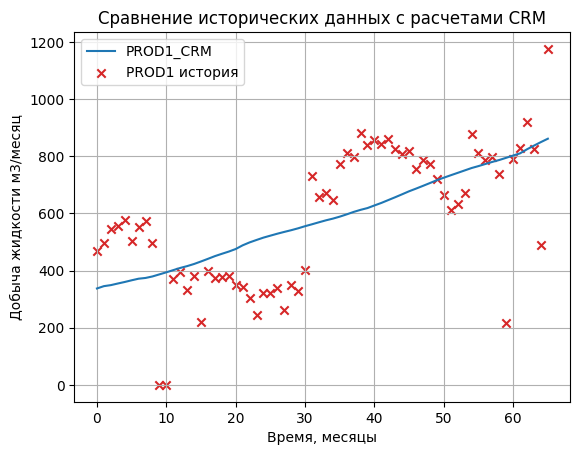

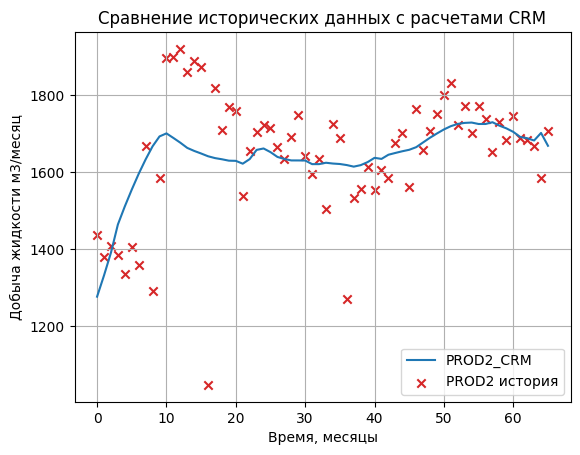

In [11]:
PROD1_CRM = []
PROD2_CRM = []
PROD11 = [0]*len(PROD1)
PROD12 = [0]*len(PROD1)
PROD21 = [0]*len(PROD1)
PROD22 = [0]*len(PROD1)
PROD11[0] = (qliq0_11) 
PROD12[0] = (qliq0_12) 
PROD21[0] = (qliq0_21)
PROD22[0] = (qliq0_22)
for i in range(len(PROD11)):
    PROD11[i+1] = PROD11[i] * math.exp(-(TIME[i+1]-TIME[i])/tau11)+(1 - math.exp(-(TIME[i+1]-TIME[i])/tau11))*f11*INJ1[i+1]
    if PROD11[i] == PROD11[len(PROD11)-2]:
        break
    #print(PROD11)
for i in range(len(PROD12)):
    PROD12[i+1] = PROD12[i] * math.exp(-(TIME[i+1]-TIME[i])/tau12)+(1 - math.exp(-(TIME[i+1]-TIME[i])/tau12))*f12*INJ2[i+1]
    if PROD12[i] == PROD12[len(PROD12)-2]:
        break
#print(PROD12)
for i in range(len(PROD21)):
    PROD21[i+1] = PROD21[i] * math.exp(-(TIME[i+1]-TIME[i])/tau21)+(1 - math.exp(-(TIME[i+1]-TIME[i])/tau21))*f21*INJ1[i+1]
    if PROD21[i] == PROD21[len(PROD21)-2]:
        break
#print(PROD21)     
for i in range(len(PROD22)):
    PROD22[i+1] = PROD22[i] * math.exp(-(TIME[i+1]-TIME[i])/tau22)+(1 - math.exp(-(TIME[i+1]-TIME[i])/tau22))*f22*INJ2[i+1]
    if PROD22[i] == PROD22[len(PROD22)-2]:
        break
#print(PROD22)

for i in range(len(PROD11)):
    s = PROD11[i] + PROD12[i]
    PROD1_CRM.append(s)
for i in range(len(PROD21)):
    s = PROD21[i] + PROD22[i]
    PROD2_CRM.append(s)

import matplotlib.pyplot as plt
x = TIME
y1 = PROD1_CRM
y2 = PROD1


fig, ax = plt.subplots()
ax.plot(x, y1, label='PROD1_CRM') 
ax.scatter(x, y2, marker = "x", color='tab:red', label='PROD1 история') 

ax.set_xlabel('Время, месяцы')  
ax.set_ylabel('Добыча жидкости м3/месяц')  
ax.set_title("Сравнение исторических данных с расчетами CRM") 
ax.grid(True);
ax.legend();

import matplotlib.pyplot as plt
x = TIME
y1 = PROD2_CRM
y2 = PROD2

fig, ax = plt.subplots()
ax.plot(x, y1, label='PROD2_CRM')  
ax.scatter(x, y2, marker = "x", color='tab:red', label='PROD2 история')  

ax.set_xlabel('Время, месяцы') 
ax.set_ylabel('Добыча жидкости м3/месяц')  
ax.set_title("Сравнение исторических данных с расчетами CRM")  
ax.grid(True);
ax.legend();

In [12]:
tau11

11801.183714614712

In [13]:

TIME_PRED =[]
t_add = 55 #Задаем количество времени на прогноз от момента старого времени 
inj1_add = 1222 #Задаем расход закачки в месяц на прогноз
inj2_add = 1222 #Задаем расход закачки в месяц на прогноз
t_last = len(TIME) #Последний момент времени (находится вне списка)
for i in range(t_add):
    pepe = t_last + i
    TIME_PRED.append(pepe)

INJ1_PRED = [inj1_add]*len(TIME_PRED)
INJ2_PRED = [inj2_add]*len(TIME_PRED)
n = [0]*len(TIME_PRED)
PROD11_PRED = n
PROD12_PRED = n
PROD21_PRED = n
PROD22_PRED = n
PROD11_PRED[0] = PROD11[len(PROD11)-1]
PROD12_PRED[0] = PROD12[len(PROD12)-1]
PROD21_PRED[0] = PROD21[len(PROD21)-1]
PROD22_PRED[0] = PROD22[len(PROD22)-1]
PROD1_CRM_PRED = []
PROD2_CRM_PRED = []

In [14]:
PROD11_PRED

[984.664611076545,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [15]:
for i in range(len(TIME_PRED)):
    PROD11_PRED[i+1] = PROD11_PRED[i] * math.exp(-(TIME_PRED[i+1]-TIME_PRED[i])/tau11)+(1 - math.exp(-(TIME_PRED[i+1]-TIME_PRED[i])/tau11))*f11*INJ1_PRED[i+1]
    if PROD11_PRED[i] == PROD11_PRED[len(PROD11_PRED)-2]:
        break

for i in range(len(TIME_PRED)):
    PROD12_PRED[i+1] = PROD12_PRED[i] * math.exp(-(TIME_PRED[i+1]-TIME_PRED[i])/tau12)+(1 - math.exp(-(TIME_PRED[i+1]-TIME_PRED[i])/tau12))*f12*INJ2_PRED[i+1]
    if PROD12_PRED[i] == PROD12_PRED[len(PROD12_PRED)-2]:
        break

for i in range(len(TIME_PRED)):
    PROD21_PRED[i+1] = PROD21_PRED[i] * math.exp(-(TIME_PRED[i+1]-TIME_PRED[i])/tau21)+(1 - math.exp(-(TIME_PRED[i+1]-TIME_PRED[i])/tau21))*f21*INJ1_PRED[i+1]
    if PROD21_PRED[i] == PROD21_PRED[len(PROD21_PRED)-2]:
        break
    
for i in range(len(TIME_PRED)):
    PROD22_PRED[i+1] = PROD22_PRED[i] * math.exp(-(TIME_PRED[i+1]-TIME_PRED[i])/tau22)+(1 - math.exp(-(TIME_PRED[i+1]-TIME_PRED[i])/tau22))*f22*INJ2_PRED[i+1]
    if PROD22_PRED[i] == PROD22_PRED[len(PROD22_PRED)-2]:
        break

for i in range(len(TIME_PRED)):
    s = PROD11_PRED[i] + PROD12_PRED[i]
    PROD1_CRM_PRED.append(s)
for i in range(len(TIME_PRED)):
    s = PROD21_PRED[i] + PROD22_PRED[i]
    PROD2_CRM_PRED.append(s)

    





In [16]:
len(TIME_PRED)
len(PROD2_CRM_PRED)

55

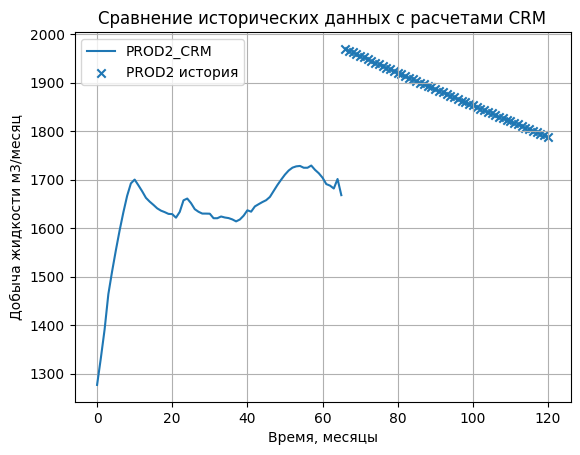

In [17]:
import matplotlib.pyplot as plt
x1 = TIME
x2 = TIME_PRED
y1 = PROD2_CRM
y2 = PROD1_CRM_PRED

fig, ax = plt.subplots()
ax.plot(x, y1, label='PROD2_CRM')  
ax.scatter(x2, y2, marker = "x", color='tab:blue', label='PROD2 история')  

ax.set_xlabel('Время, месяцы') 
ax.set_ylabel('Добыча жидкости м3/месяц')  
ax.set_title("Сравнение исторических данных с расчетами CRM")  
ax.grid(True);
ax.legend();

In [18]:
print(PROD1_CRM_PRED)

[1969.32922215309, 1965.8059022574118, 1962.2888859208072, 1958.778161865601, 1955.2737188342953, 1951.7755455895324, 1948.2836309140596, 1944.7979636106927, 1941.3185325022807, 1937.8453264316695, 1934.378334261666, 1930.9175448750027, 1927.4629471743021, 1924.0145300820411, 1920.572282540515, 1917.1361935118025, 1913.7062519777303, 1910.2824469398377, 1906.864767419341, 1903.4532024570992, 1900.0477411135778, 1896.6483724688142, 1893.2550856223827, 1889.8678696933598, 1886.4867138202885, 1883.1116071611445, 1879.7425388933007, 1876.3794982134925, 1873.022474337784, 1869.6714565015322, 1866.3264339593534, 1862.9873959850881, 1859.6543318717675, 1856.327230931578, 1853.006082495828, 1849.6908759149128, 1846.3816005582812, 1843.078245814401, 1839.780801090725, 1836.489255813657, 1833.2035994285184, 1829.9238213995131, 1826.6499112096956, 1823.3818583609354, 1820.1196523738847, 1816.863282787944, 1813.6127391612285, 1810.3680110705357, 1807.1290881113107, 1803.8959598976135, 1800.6686160

In [19]:
print(INJ2_PRED)

[1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222]
